In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
import numpy as np
import seaborn as sns
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from prophet.diagnostics import cross_validation

In [ ]:
df1 = df[['data','volume']]
df1
caminho_arquivo = 'volume.xlsx'
df1.to_excel(caminho_arquivo, index=False)

In [ ]:
df1

,data,volume
0,21/07/2023 11:45:00,304.0
1,21/07/2023 11:50:00,304.0
2,21/07/2023 11:35:00,312.0
3,21/07/2023 12:05:00,304.0
4,21/07/2023 13:10:00,328.0
...,...,...
40921,12/12/2023 01:10:00,216.0
40922,12/12/2023 00:15:00,272.0
40923,12/12/2023 00:30:00,288.0
40924,12/12/2023 00:00:00,320.0


In [ ]:
df1 = df[['data','volume']]

df2 = df1[['data', 'volume']].rename(columns={'data': 'ds', 'volume': 'y'})
df2['ds'] = pd.to_datetime(df2['ds'])

df2 = df2.loc[df2['y'] <= 400]
df2 = df2.loc[df2['y'] >= 200]

df2.sort_values('ds', inplace=True)
df2


C:\Users\tobias.barreto\AppData\Local\Temp\ipykernel_27196\3083477447.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['ds'] = pd.to_datetime(df2['ds'])


,ds,y
121,2023-07-21 00:00:00,328.0
138,2023-07-21 00:05:00,280.0
162,2023-07-21 00:10:00,360.0
140,2023-07-21 00:15:00,304.0
141,2023-07-21 00:20:00,336.0
...,...,...
40864,2023-12-12 14:00:00,288.0
40853,2023-12-12 14:05:00,288.0
40849,2023-12-12 14:10:00,256.0
40863,2023-12-12 14:15:00,320.0


In [ ]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 39852 entries, 121 to 40865
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      39852 non-null  datetime64[ns]
 1   y       39852 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 934.0 KB


,ds,y
count,39852,39852.000000
mean,2023-10-01 06:48:03.149578496,293.075981
min,2023-07-21 00:00:00,200.000000
25%,2023-08-26 04:13:45,264.000000
50%,2023-09-30 11:47:30,296.000000
75%,2023-11-06 05:06:15,328.000000
max,2023-12-12 14:20:00,400.000000
std,NaN,41.386448


<Axes: xlabel='ds'>

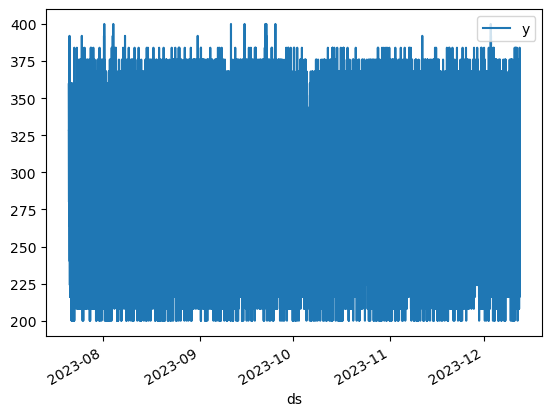

In [ ]:
df2.set_index('ds', inplace=True)
df2.plot()

<Axes: xlabel='ds'>

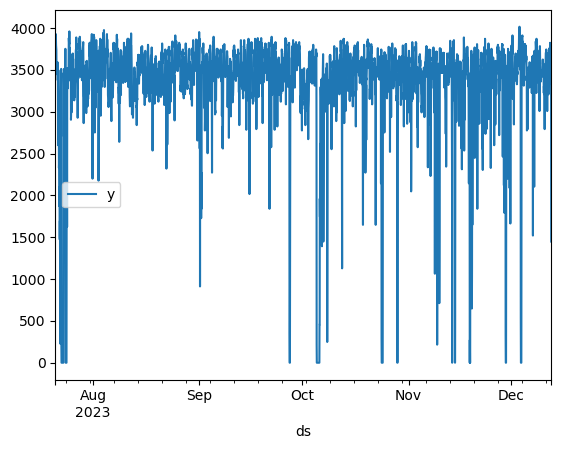

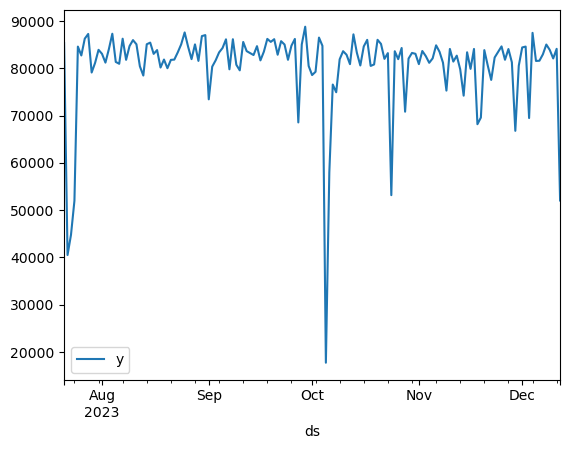

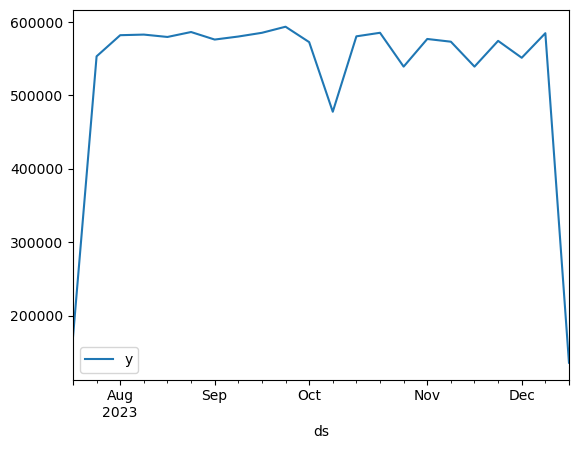

In [ ]:

df_hora = df2.resample('h').sum()
df_dia = df2.resample('d').sum()
df_semana = df2.resample('w').sum()

df_hora.plot()
df_dia.plot()
df_semana.plot()

In [ ]:
df_hora

,ds,y
0,2023-07-21 00:00:00,3808.0
1,2023-07-21 01:00:00,3888.0
2,2023-07-21 02:00:00,3832.0
3,2023-07-21 03:00:00,3800.0
4,2023-07-21 04:00:00,3928.0
...,...,...
3466,2023-12-12 10:00:00,3504.0
3467,2023-12-12 11:00:00,3456.0
3468,2023-12-12 12:00:00,3336.0
3469,2023-12-12 13:00:00,3480.0


In [ ]:
df_hora.describe()

,y
count,3471.000000
mean,3364.927687
std,611.246770
min,0.000000
25%,3324.000000
50%,3488.000000
75%,3648.000000
max,4016.000000


In [ ]:
df_download = df_hora
df_download
caminho_arquivo = 'volume_hora.xlsx'
df_download.to_excel(caminho_arquivo, index=False)

In [ ]:
df_hora.reset_index(inplace=True)
df_dia.reset_index(inplace=True)
df_semana.reset_index(inplace=True)

In [ ]:
#divisão de teste e treino

df_hora_treino = df_hora.iloc[:-960]
df_hora_teste = df_hora.iloc[-960:]

In [ ]:
# Instanciando o modelo Prophet
modelo_hora = Prophet()

In [ ]:
df_hora_treino = df_hora.iloc[:-1041]
df_hora_teste = df_hora.iloc[-1041:]

df_hora_teste

,ds,y
2430,2023-10-30 06:00:00,3608.0
2431,2023-10-30 07:00:00,3664.0
2432,2023-10-30 08:00:00,3792.0
2433,2023-10-30 09:00:00,3480.0
2434,2023-10-30 10:00:00,3408.0
...,...,...
3466,2023-12-12 10:00:00,3504.0
3467,2023-12-12 11:00:00,3456.0
3468,2023-12-12 12:00:00,3336.0
3469,2023-12-12 13:00:00,3480.0


In [ ]:
# Ajustando o modelo aos dados
modelo_hora.fit(df_hora_treino)

17:30:59 - cmdstanpy - INFO - Chain [1] start processing
17:31:00 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Fazendo as previsões para o futuro
y_prev = modelo_hora.predict(df_hora_teste)

C:\ProgramData\Anaconda3\envs\pydev\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\Anaconda3\envs\pydev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


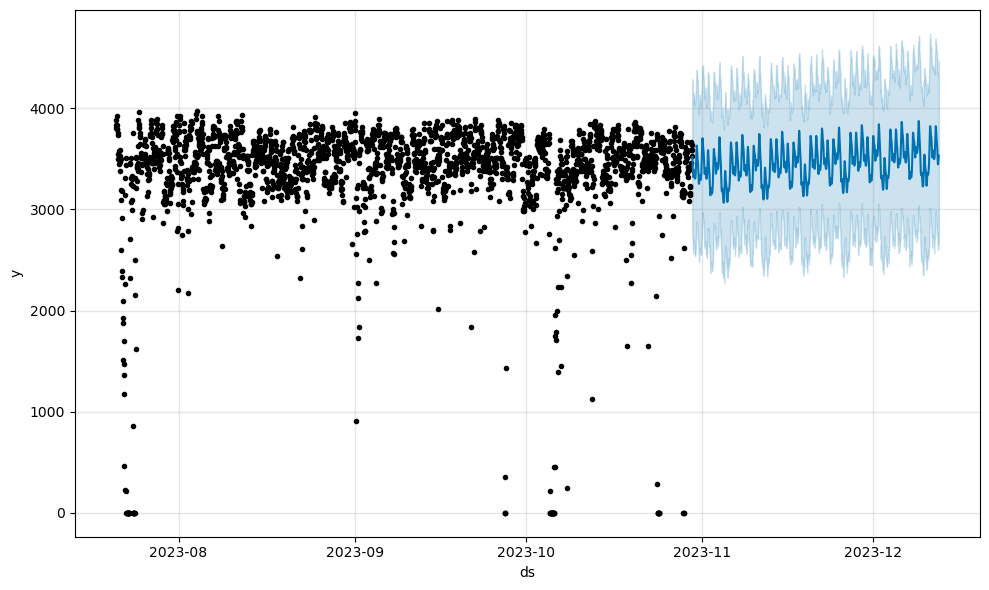

In [ ]:
modelo_hora.plot(y_prev);

In [ ]:
#df_hora_treino['y'].values
#y_prev['yhat'].values
y_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          1041 non-null   datetime64[ns]
 1   trend                       1041 non-null   float64       
 2   yhat_lower                  1041 non-null   float64       
 3   yhat_upper                  1041 non-null   float64       
 4   trend_lower                 1041 non-null   float64       
 5   trend_upper                 1041 non-null   float64       
 6   additive_terms              1041 non-null   float64       
 7   additive_terms_lower        1041 non-null   float64       
 8   additive_terms_upper        1041 non-null   float64       
 9   daily                       1041 non-null   float64       
 10  daily_lower                 1041 non-null   float64       
 11  daily_upper                 1041 non-null   float64     

In [ ]:
print('MAE: {}'.format(metrics.mean_absolute_error(df_hora_teste['y'].values, y_prev['yhat'].values)))
print('RMSE: {}'.format(metrics.mean_squared_error(df_hora_teste['y'].values, y_prev['yhat'].values, squared=False)))

MAE: 259.54912382197693
RMSE: 555.2955394982907


<Axes: xlabel='ds'>

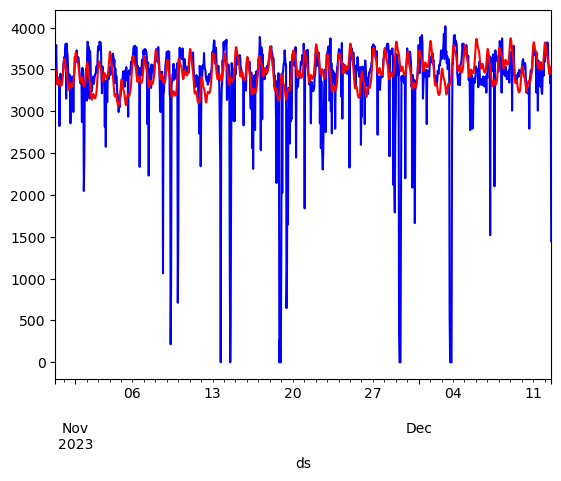

In [ ]:
df_hora_teste.set_index('ds')['y'].plot(color='blue')
y_prev.set_index('ds')['yhat'].plot(color='red')

C:\ProgramData\Anaconda3\envs\pydev\lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\Anaconda3\envs\pydev\lib\site-packages\prophet\plot.py:395: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\ProgramData\Anaconda3\envs\pydev\lib\site-packages\prophet\plot.py:399: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarra

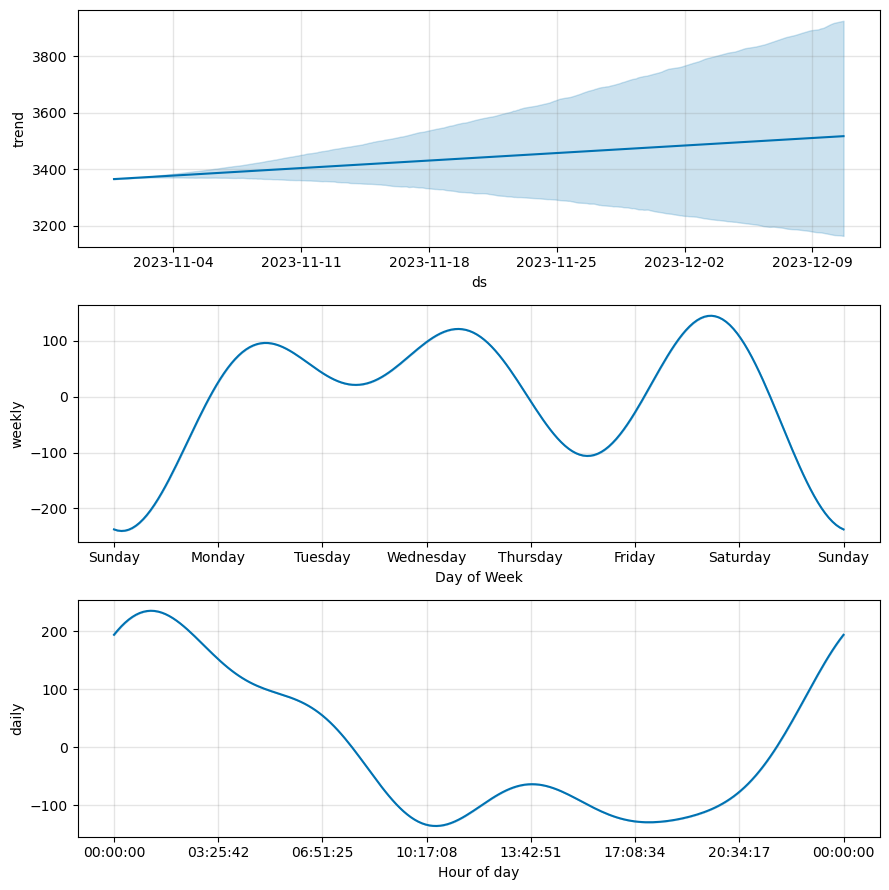

In [ ]:
componentes_hora = modelo_hora.plot_components(y_prev)
componentes_hora;

In [ ]:
df_cross_valid = cross_validation(modelo_hora, horizon = '960')
df_cross_valid

  0%|          | 0/2297 [00:00<?, ?it/s]

20:45:58 - cmdstanpy - INFO - Chain [1] start processing
20:45:58 - cmdstanpy - INFO - Chain [1] done processing
20:45:58 - cmdstanpy - INFO - Chain [1] start processing
20:45:59 - cmdstanpy - INFO - Chain [1] done processing
20:45:59 - cmdstanpy - INFO - Chain [1] start processing
20:45:59 - cmdstanpy - INFO - Chain [1] done processing
20:45:59 - cmdstanpy - INFO - Chain [1] start processing
20:45:59 - cmdstanpy - INFO - Chain [1] done processing
20:46:00 - cmdstanpy - INFO - Chain [1] start processing
20:46:00 - cmdstanpy - INFO - Chain [1] done processing
20:46:00 - cmdstanpy - INFO - Chain [1] start processing
20:46:00 - cmdstanpy - INFO - Chain [1] done processing
20:46:01 - cmdstanpy - INFO - Chain [1] start processing
20:46:01 - cmdstanpy - INFO - Chain [1] done processing
20:46:01 - cmdstanpy - INFO - Chain [1] start processing
20:46:01 - cmdstanpy - INFO - Chain [1] done processing
20:46:01 - cmdstanpy - INFO - Chain [1] start processing
20:46:01 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-07-28 01:00:00,3504.513191,2436.655752,4623.993585,3856.0,2023-07-28 00:59:59.999999040
1,2023-07-28 02:00:00,3381.839554,2431.682826,4335.776656,3760.0,2023-07-28 01:59:59.999999040
2,2023-07-28 03:00:00,3341.535196,2353.280114,4335.121895,3880.0,2023-07-28 02:59:59.999999040
3,2023-07-28 04:00:00,3417.601342,2437.304182,4428.889538,3896.0,2023-07-28 03:59:59.999999040
4,2023-07-28 05:00:00,3387.658535,2310.940856,4535.050206,3792.0,2023-07-28 04:59:59.999999040
...,...,...,...,...,...,...
2292,2023-10-31 13:00:00,3332.687144,2541.658227,4072.709642,3392.0,2023-10-31 12:59:59.999999040
2293,2023-10-31 14:00:00,3347.098295,2580.427524,4101.915209,2856.0,2023-10-31 13:59:59.999999040
2294,2023-10-31 15:00:00,3322.781806,2598.519467,4066.967215,3400.0,2023-10-31 14:59:59.999999040
2295,2023-10-31 16:00:00,3308.992582,2595.356050,4038.986424,3384.0,2023-10-31 15:59:59.999999040


19:43:32 - cmdstanpy - INFO - Chain [1] start processing
19:43:33 - cmdstanpy - INFO - Chain [1] done processing
C:\ProgramData\Anaconda3\envs\pydev\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\Anaconda3\envs\pydev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


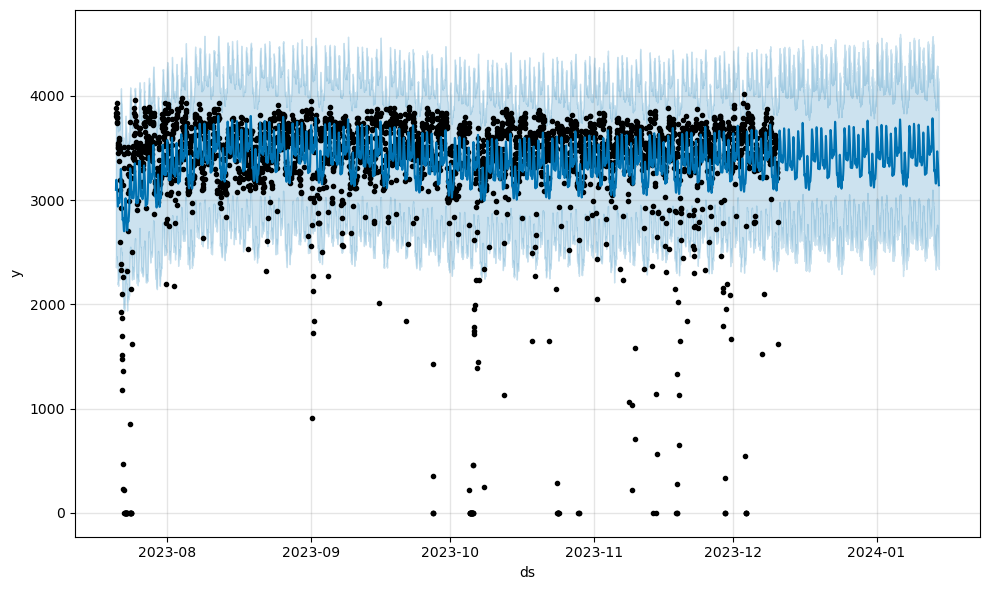

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Carregando os dados de exemplo (substitua isso pelo seu conjunto de dados)
# Certifique-se de ter uma coluna chamada 'ds' para as datas e 'y' para os valores
df_hora_treino

# Instanciando o modelo Prophet
modelo = Prophet()

# Ajustando o modelo aos dados
modelo.fit(data)

# Criando um DataFrame para as datas futuras que desejamos fazer previsões
futuro = modelo.make_future_dataframe(periods=10000, freq='5T')  # Adicionando 1 ano (365 dias) ao DataFrame existente

# Fazendo as previsões para o futuro
previsao = modelo.predict(futuro)

# Visualizando as previsões
fig = modelo.plot(previsao)
plt.show()


19:43:32 - cmdstanpy - INFO - Chain [1] start processing
19:43:33 - cmdstanpy - INFO - Chain [1] done processing
C:\ProgramData\Anaconda3\envs\pydev\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\Anaconda3\envs\pydev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


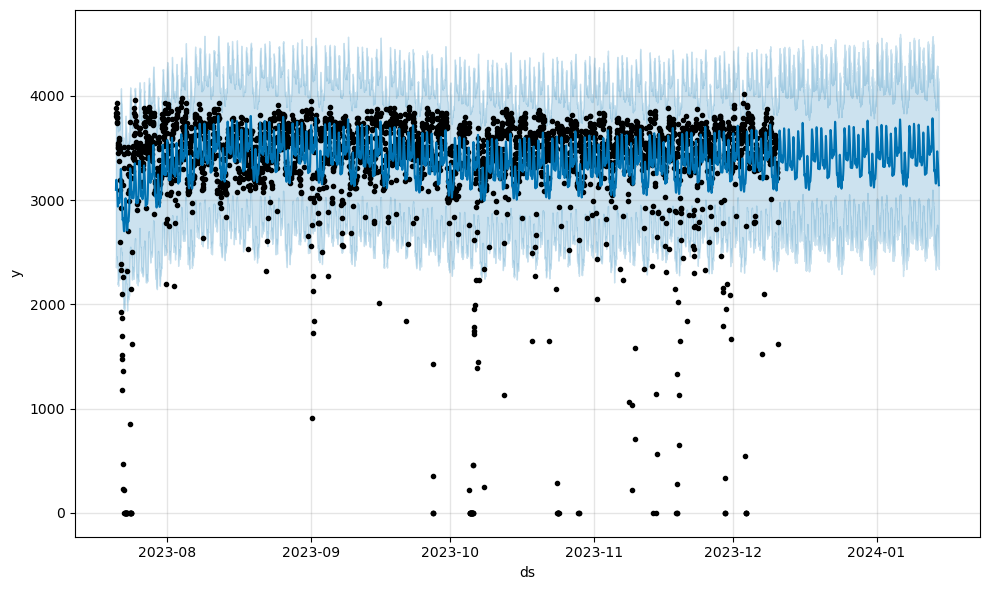

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Carregando os dados de exemplo (substitua isso pelo seu conjunto de dados)
# Certifique-se de ter uma coluna chamada 'ds' para as datas e 'y' para os valores
df_hora_treino

# Instanciando o modelo Prophet
modelo = Prophet()

# Ajustando o modelo aos dados
modelo.fit(data)

# Criando um DataFrame para as datas futuras que desejamos fazer previsões
futuro = modelo.make_future_dataframe(periods=10000, freq='5T')  # Adicionando 1 ano (365 dias) ao DataFrame existente

# Fazendo as previsões para o futuro
previsao = modelo.predict(futuro)

# Visualizando as previsões
fig = modelo.plot(previsao)
plt.show()


In [ ]:
#teste ADF

# extraindo os valores
X = df2.y

# aplicando o ADF e imprimindo os resultados.
result = adfuller(X)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.4f}'.format(result[0]))
print('P Value: {:.10f}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Augmented Dickey–Fuller
Statistical Test: -17.0530
P Value: 0.0000000000
Critical Values:
	1%: -3.4305
	5%: -2.8616
	10%: -2.5668


In [ ]:
# gerado os dados
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-07-21 00:00:00,289.139200,256.202995,359.955333,289.139200,289.139200,15.898923,15.898923,15.898923,9.807016,9.807016,9.807016,6.091907,6.091907,6.091907,0.0,0.0,0.0,305.038123
1,2023-07-21 00:05:00,289.140635,252.007578,352.909537,289.140635,289.140635,16.448339,16.448339,16.448339,10.331559,10.331559,10.331559,6.116781,6.116781,6.116781,0.0,0.0,0.0,305.588974
2,2023-07-21 00:10:00,289.142070,256.226427,358.328661,289.142070,289.142070,16.975461,16.975461,16.975461,10.833957,10.833957,10.833957,6.141504,6.141504,6.141504,0.0,0.0,0.0,306.117531
3,2023-07-21 00:15:00,289.143505,253.032708,356.970215,289.143505,289.143505,17.479131,17.479131,17.479131,11.313058,11.313058,11.313058,6.166073,6.166073,6.166073,0.0,0.0,0.0,306.622637
4,2023-07-21 00:20:00,289.144941,256.534950,356.507505,289.144941,289.144941,17.958312,17.958312,17.958312,11.767824,11.767824,11.767824,6.190488,6.190488,6.190488,0.0,0.0,0.0,307.103253
